<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/notes/mod3_param_surface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sympy as sym

sym.init_printing()

In [2]:
x, y, z = sym.symbols('x y z')

## Parameterized Surfaces



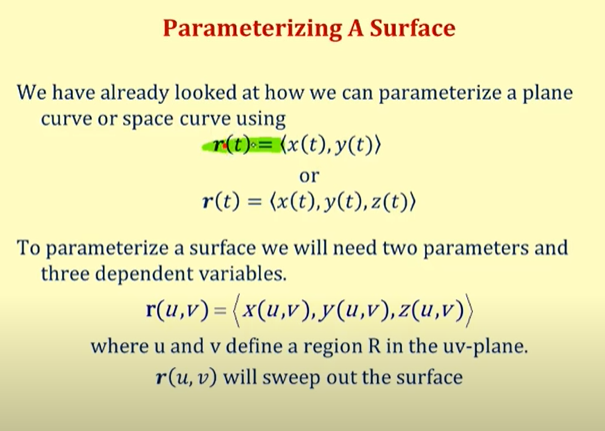

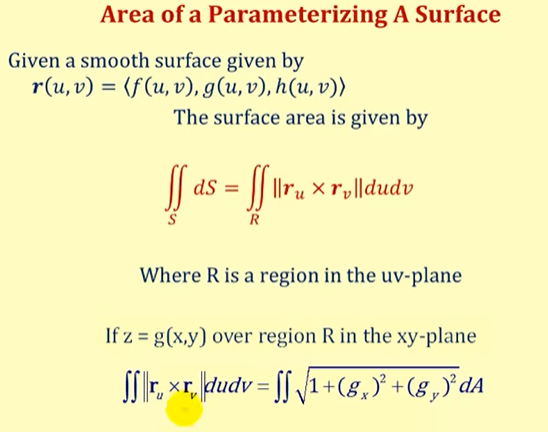

## Surface Integral with Surface Defined Explictly

For a surface S given by $ z = g(x,y) $ that is continuous and differentiable over a region $ R $ in the $xy$-plane

$$ \iint\limits_S f(x,y,z) \ dS = \iint\limits_R f(x, y, g(x,y)) \sqrt{1 + (g_s)^2 + (g_y)^2} \ dA $$

#### Example 1:

Integrate $ f(x,y,z) = xy $ over the surface $ z = 4 - 2x - 2y $ in the first octant.

$$ = \iint\limits_R f(x, y, 4-2x-2y) \sqrt{1 + (-2)^2 + (-2)^2}  \ dy \ dx $$

In [3]:
f = x*y
z = 4 - 2*x - 2*y

gx = sym.diff(z, x)
gy = sym.diff(z, y)
y_eq = sym.solve(z, y)
print('y equation = ', y_eq)
s_rt = 1 + gx**2 + gy**2
s_fac = sym.sqrt(s_rt)
print(s_rt, s_fac)
f, z, gx, gy

y equation =  [2 - x]
9 3


In [4]:
sol = s_fac * sym.integrate(f, (y, 0, y_eq), (x, 0, 2))
sol

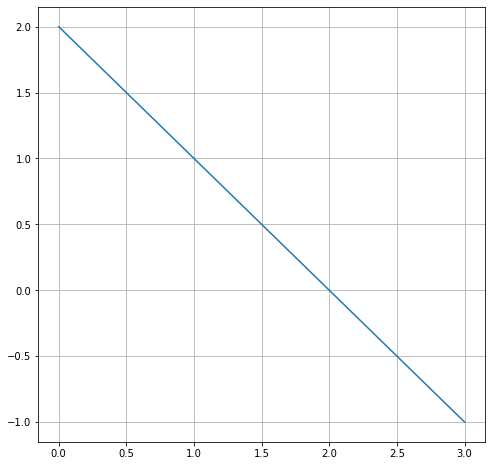

In [6]:
# plot
ax = plt.figure(figsize=(8,8)).add_subplot(111)
xvals = np.arange(4)

ax.plot(xvals, -xvals + 2)
ax.grid()

plt.show()

## Surface Integral with the Surface Defined Parametrically

Given a smooth surface given by $ r(u, v) = \left\langle x(u,v),y(u,v),z(u,v)\right\rangle $ and f is a continuous function

$$ \iint\limits_S f(x,y,z)dS \ = \ \iint\limits_R f\left(x(u,v),y(u,v),z(u,v)\right) \| r_u \times r_v \| \ dA $$

#### Example 1: 

Evaluate $ \iint\limits_S f(x,y,z) dS $ using a parametric surface given by $ f(x,y,z) = xy $ and $ S \text{ is } x^2 + y^2 = 4, \  0 \le z \leq 8 $ in the first octant 

In [32]:
# Cylindrical
u, v, r, theta = sym.symbols('u v r theta')

ulim = (0, sym.pi/2)
vlim = (0, 8)

r_uv = sym.Matrix([2*sym.cos(u), 2*sym.sin(u), v])
r_uv

⎡2⋅cos(u)⎤
⎢        ⎥
⎢2⋅sin(u)⎥
⎢        ⎥
⎣   v    ⎦

In [33]:
r_u = [sym.diff(r, u) for r in r_uv]
r_v = [sym.diff(r, v) for r in r_uv]

r_u, r_v

In [38]:
r_u, r_v = sym.Matrix([r_u]), sym.Matrix([r_v])
cross_prod = r_u.cross(r_v)
cross_prod

[2⋅cos(u)  2⋅sin(u)  0]

In [54]:
mag = sym.factor(sym.sqrt(cross_prod[0]**2 + cross_prod[1]**2 + cross_prod[2]**2))
display(mag)
mag = mag.subs((sym.sin(u)**2 + sym.cos(u)**2), 1)
print('should simply to', mag)

should simply to 2


In [56]:
int_R = r_uv[0] * r_uv[1] * mag
int_R

In [58]:
sol = sym.integrate(int_R, (v, vlim[0], vlim[1]), (u, ulim[0], ulim[1]))
sol

#### Example 2:

Evaluate $ \iint\limits_S f(x,y,z) \ dS $ using a parametric surface given $ f(x, y, z) = x^2 + y^2 $ and $ S $ is the hemisphere $ x^2 + y^2 + z^2 = 1 $ above the plane

$ x = \rho \sin(\phi)\cos(\theta) $

$ y = \rho \sin(\phi)\sin(\theta) $

$ z = \rho \cos(\theta) $ 

$ \phi = u $ ; $\theta = v $


In [138]:
# Spherical
u, v, r, rho, theta, phi = sym.symbols('u v r rho theta phi')

ulim = (0, sym.pi/2)
vlim = (0, 2*sym.pi)

r_uv = sym.Matrix([sym.sin(u)*sym.cos(v), sym.sin(u)*sym.sin(v), sym.cos(u)])
r_uv

⎡sin(u)⋅cos(v)⎤
⎢             ⎥
⎢sin(u)⋅sin(v)⎥
⎢             ⎥
⎣   cos(u)    ⎦

##### Show Intemediary steps (factor and simplify)

In [139]:
# cross_prod = [sym.factor(c) for c in cross_prod]
    
cross_prod = [sym.simplify(c) for c in cross_prod]

cross_prod

In [140]:
mag = sym.sqrt(cross_prod[0]**2 + cross_prod[1]**2 + cross_prod[2]**2)
display(mag)

mag = sym.simplify(mag)
mag
# mag = mag.subs((sym.sin(u)**2 + sym.cos(u)**2), 1)
# print('should simply to', mag)

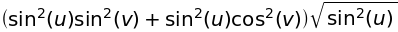

In [141]:
# f(x,y,z) = x^2 + y^2

int_R = (r_uv[0]**2 + r_uv[1]**2) * mag
int_R

In [142]:
r_u, r_v = sym.Matrix([r_u]), sym.Matrix([r_v])
cross_prod = r_u.cross(r_v)
cross_prod

⎡   2               2                      2                              2   
⎣sin (u)⋅cos(v)  sin (u)⋅sin(v)  sin(u)⋅sin (v)⋅cos(u) + sin(u)⋅cos(u)⋅cos (v)

⎤
⎦

In [143]:
r_u = [sym.diff(r, u) for r in r_uv]
r_v = [sym.diff(r, v) for r in r_uv]

r_u, r_v

##### Solution

In [144]:
sol = sym.integrate(int_R, (v, vlim[0], vlim[1]), (u, ulim[0], ulim[1]))
sol



---


## Plotting


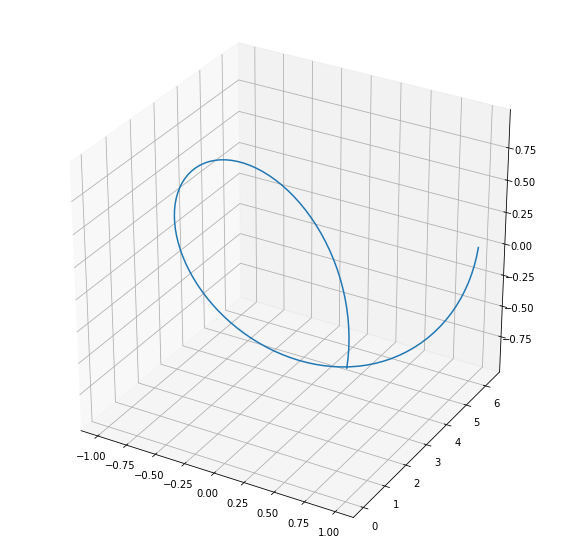

In [153]:
# Grid Curves

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = t
z = np.sin(t)

ax.plot(x, y, z)

plt.show()

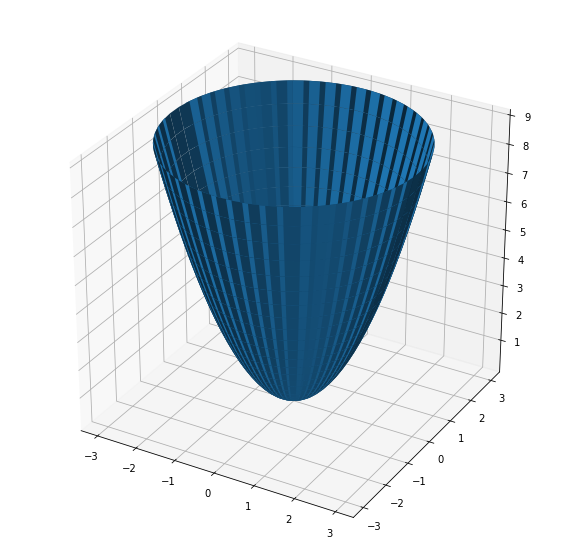

In [167]:
# Surfaces

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

u, v = np.linspace(-3, 3), np.linspace(-3, 3)
U, V = np.meshgrid(u, v)
X = (V)*np.cos(U)
Y = (V)*np.sin(U)
Z = V**2

surf = ax.plot_surface(X, Y, Z)